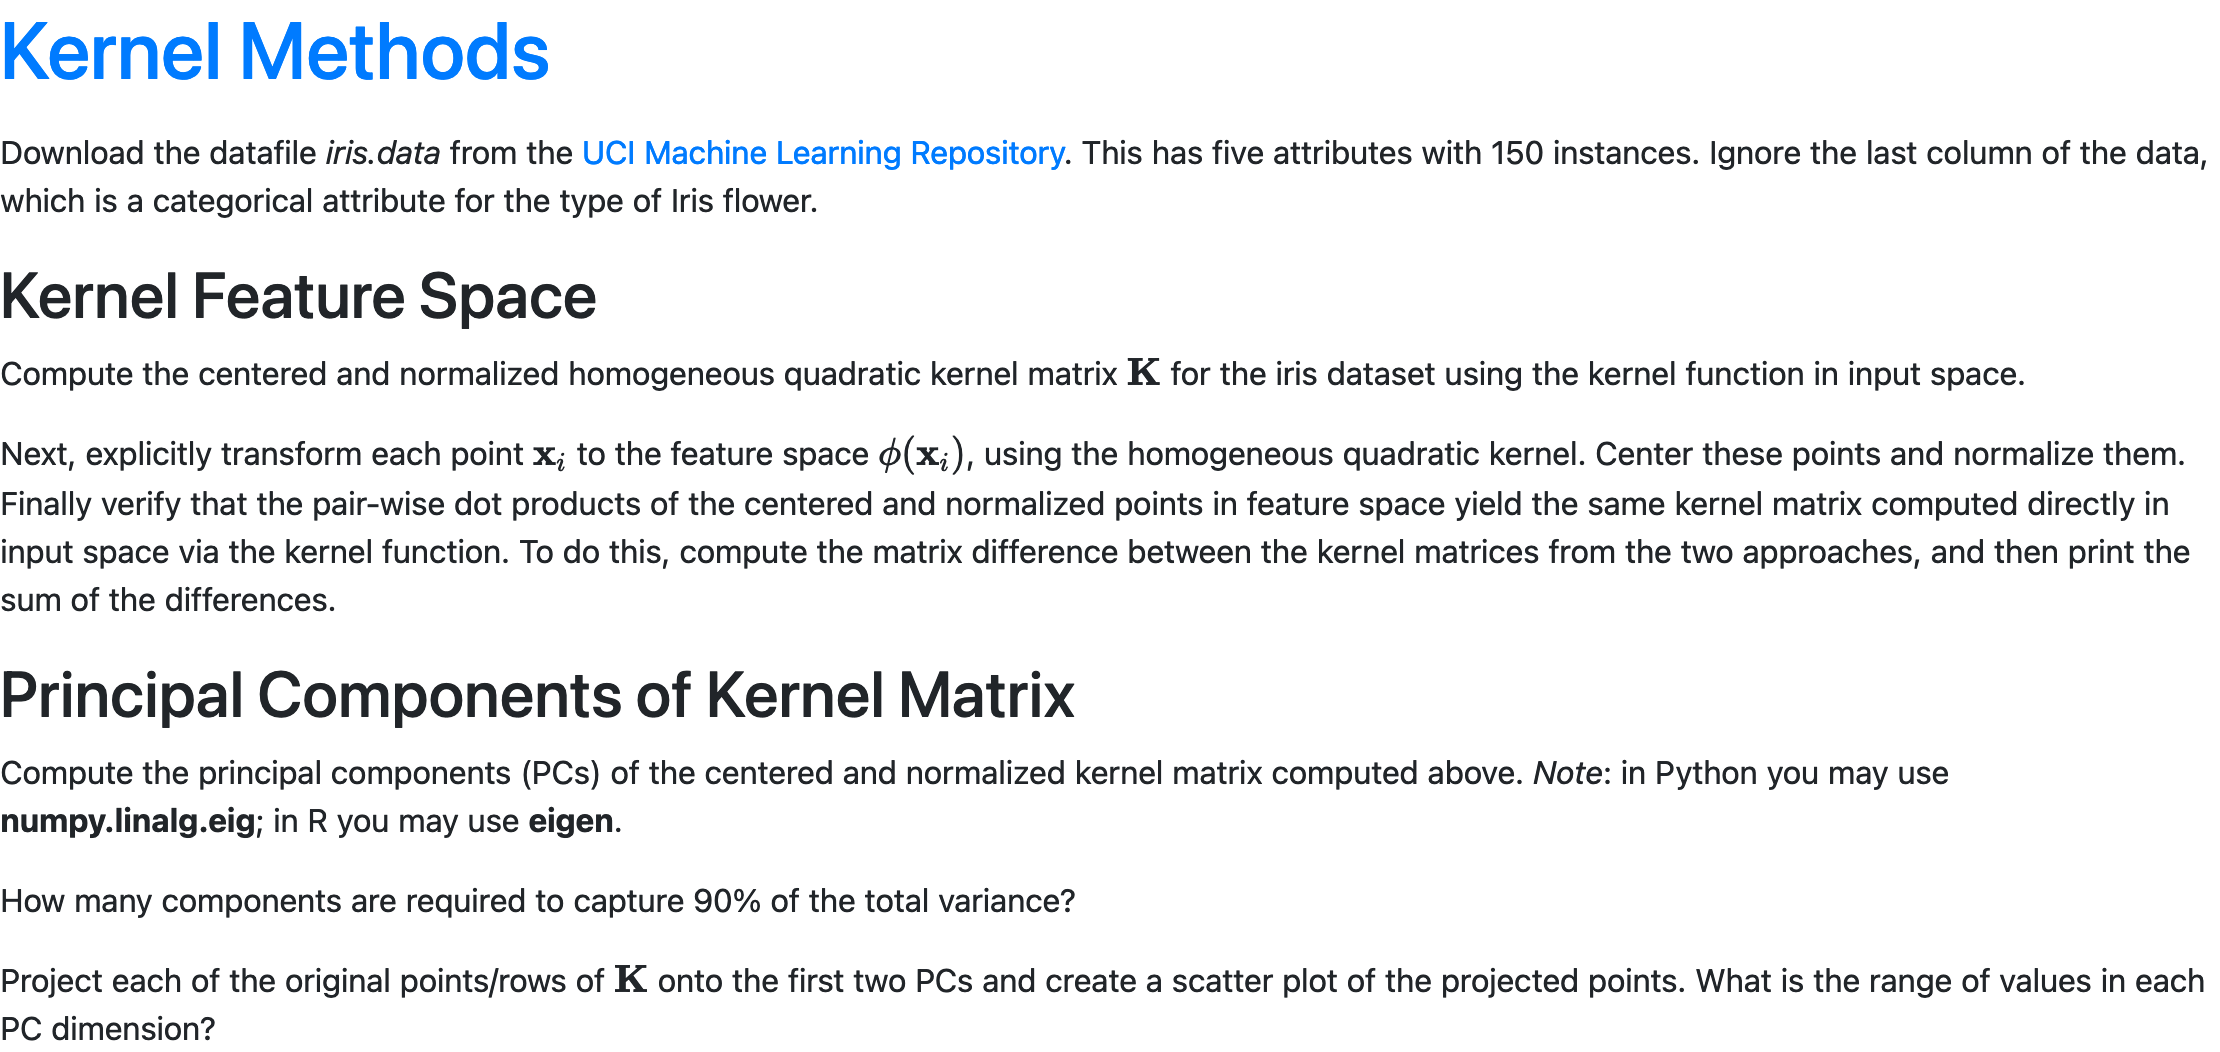

In [1]:
!cat data/iris/iris.names

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('data/iris/iris.data', header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = df.drop(['class'], axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Kernel Feature Space

In [6]:
def quadratic_kernel_matrix(df: pd.DataFrame):
    X = df.values
    return (X @ X.T) ** 2

In [7]:
K = quadratic_kernel_matrix(df)
K.shape

(150, 150)

In [8]:
def center_normalized_kernel(K: np.ndarray):
    n, d = K.shape
    K_center = (np.eye(n, n) - np.ones((n, n))/n) @ K @ (np.eye(n, n) - np.ones((n, n))/n)                                                       
    W = np.diag(1 / np.sqrt(np.diag(K_center)))
    return W @ K_center @ W   

In [9]:
K_cn = center_normalized_kernel(K)
K_cn.shape

(150, 150)

In [10]:
import itertools

In [11]:
def transform_feature(df: pd.DataFrame):
    n, d = df.shape
    features = df ** 2
    for i, j in itertools.combinations(range(d), 2):
        features = pd.concat([features, np.sqrt(2) * df.iloc[:, i] * df.iloc[:, j]], axis=1, ignore_index=True)
    return features

In [12]:
feature_points = transform_feature(df)
points_cn = feature_points.apply(lambda s: (s - s.mean()), axis=0).apply(lambda s: s / np.linalg.norm(s), axis=1)

In [13]:
K_cn_2 = points_cn @ points_cn.T

In [14]:
print((K_cn - K_cn_2).sum().sum())

2.7501112281544393e-12


## Principal Components of Kernel Matrix

In [15]:
w, v = np.linalg.eig(K_cn)
w = w.real

In [16]:
(w.cumsum() / w.sum() > 0.9).argmax() + 1

2

2 components are required to capture 90% of the total variance

In [17]:
pc1 = v[:, 0].real
pc2 = v[:, 1].real

In [18]:
pc1_coordinate = K_cn @ pc1
pc2_coordinate = K_cn @ pc2

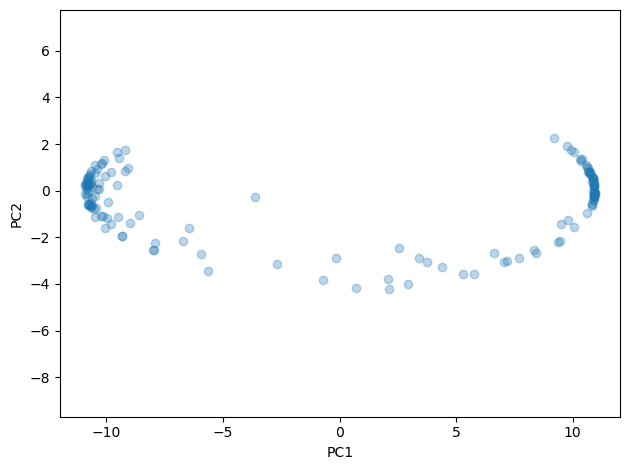

In [19]:
fig, ax = plt.subplots()

ax.scatter(pc1_coordinate, pc2_coordinate, alpha=0.3)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.tight_layout()
plt.axis('equal')
plt.show()